In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_prepared = pd.read_csv('df_prepared.csv')

X = df_prepared.drop(columns=['price'])
y = df_prepared['price']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Standartazing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Regressor

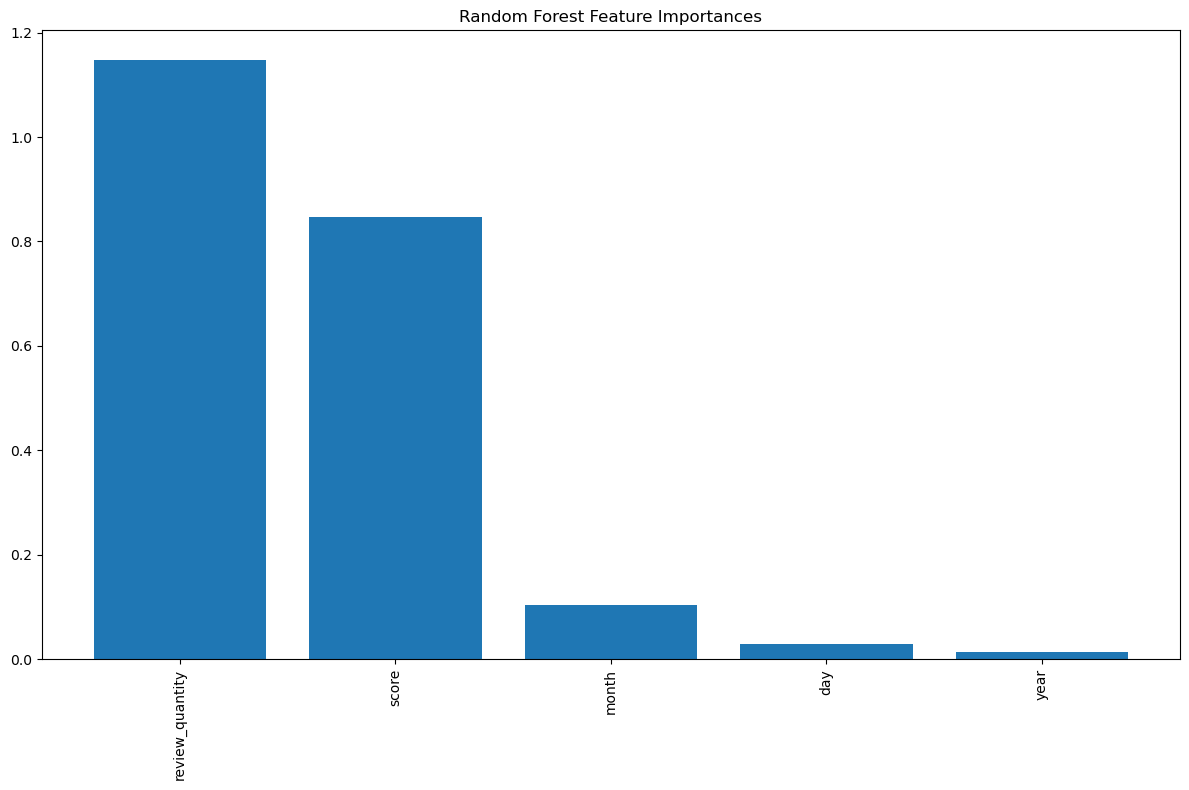

Random Forest Regressor:
Geriausi parametrai: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Treniravimo MSE: 218.58279386890567
Testavimo MSE: 395.955824220182
Treniravimo R2: 0.9444711366419576
Testavimo R2: 0.9056533144932201
Kryžminės validacijos (cv=5) R2 reikšmės: [0.8950722  0.85541201 0.90714772 0.89940814 0.91540254]
Kryžminės validacijos (cv=5) vidutinis R2: 0.8944885186936903
Kryžminės validacijos (cv=10) R2 reikšmės: [0.89555645 0.90592677 0.76766183 0.842691   0.91217124 0.91408829
 0.90800413 0.89879853 0.92574572 0.91299312]
Kryžminės validacijos (cv=10) vidutinis R2: 0.8883637076986799


In [5]:
# Creating Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

rf_regressor = RandomForestRegressor(random_state=42)

# Nustatome hiperparametrų tinklą
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearch to find best params
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_

# best model
best_model_rf = grid_search_rf.best_estimator_

# Doing prognosis with best model 
y_train_pred_rf = best_model_rf.predict(X_train_scaled)
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Evaluating model
train_mse_rfr = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rfr = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rfr = r2_score(y_train, y_train_pred_rf)
test_r2_rfr = r2_score(y_test, y_test_pred_rf)

#Cross validation with full data set
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_rfp_5 = cross_val_score(best_model_rf, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_rfp_10 = cross_val_score(best_model_rf, X_combined_scaled, y_combined, cv=10, scoring='r2')

#Feature importances
result_rf = permutation_importance(best_model_rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean

# Visualizing Feature importances
features = X.columns
indices_rf = np.argsort(importance_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_test.shape[1]), importance_rf[indices_rf], align="center")
plt.xticks(range(X_test.shape[1]), features[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

#Printing results
print("Random Forest Regressor:")
print(f'Geriausi parametrai: {best_params_rf}')
print(f'Treniravimo MSE: {train_mse_rfr}')
print(f'Testavimo MSE: {test_mse_rfr}')
print(f'Treniravimo R2: {train_r2_rfr}')
print(f'Testavimo R2: {test_r2_rfr}')

print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_rfp_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_rfp_5.mean()}')

print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_rfp_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_rfp_10.mean()}')




### Random forest regressor with polynomial features

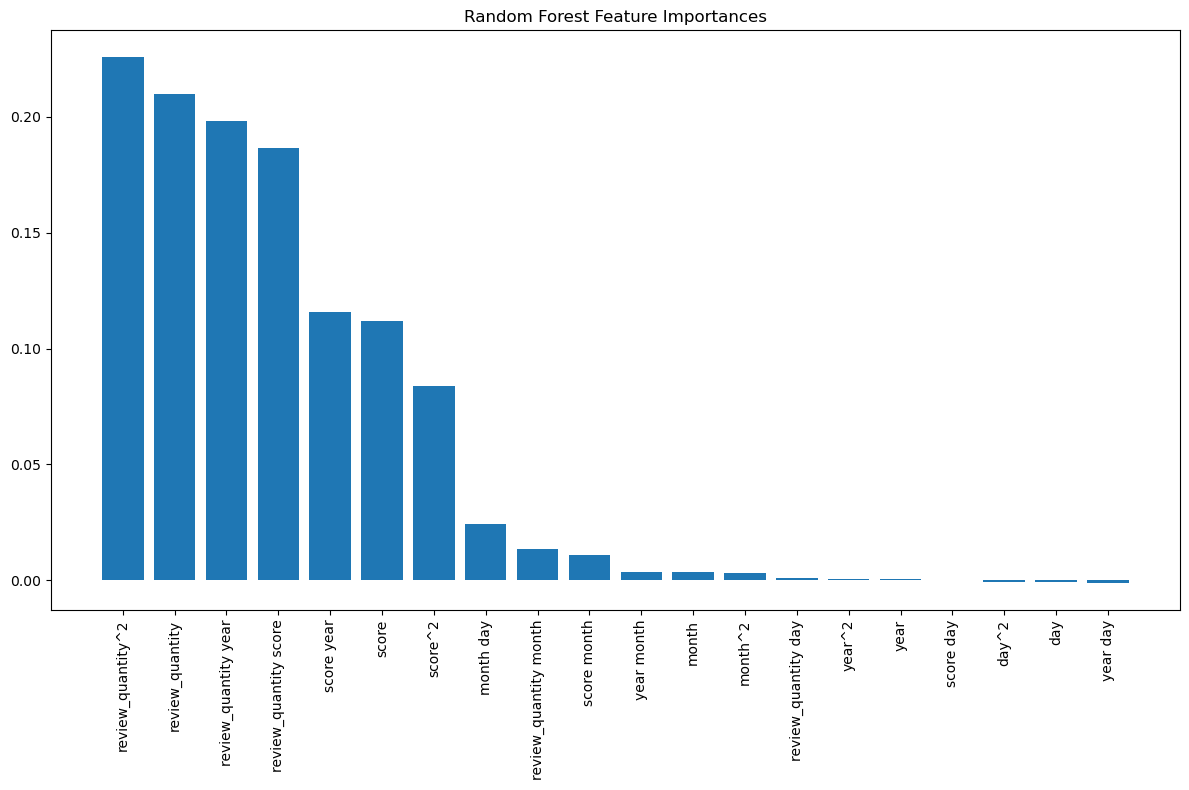

Random Forest Regressor:
Geriausi parametrai: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Treniravimo MSE: 158.81379313172314
Testavimo MSE: 351.88533896456573
Treniravimo R2: 0.9603957933988702
Testavimo R2: 0.9136839155702657
Kryžminės validacijos (cv=5) r2 reikšmės: [0.75931783 0.77953884 0.82656052 0.89302302 0.73061179]
Kryžminės validacijos (cv=5) vidutinis r2: 0.7978104013895934
Kryžminės validacijos (cv=10) r2 reikšmės: [0.79624833 0.86761218 0.87230159 0.76214442 0.80102713 0.9069686
 0.88880865 0.88432612 0.82885061 0.81977847]
Kryžminės validacijos (cv=10) vidutinis r2: 0.8428066104601415


In [6]:
# Random Forest Regressor su polynomial features

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# data ploting to a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Setting hyperparameters web
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearch to find best params
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_

# Best model 
best_model_rf = grid_search_rf.best_estimator_

# Making predictions with best model
y_train_pred_rf = best_model_rf.predict(X_train_scaled)
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Model evaluation
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Cross validation with full data set 
X_combined_scaled = scaler.fit_transform(X_poly)

cv_scores_rf_5 = cross_val_score(best_model_rf, X_combined_scaled, y, cv=5, scoring='r2')
cv_scores_rf_10 = cross_val_score(best_model_rf, X_combined_scaled, y, cv=10, scoring='r2')

#Evaluating feature importances
result_rf = permutation_importance(best_model_rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean

#Feature importances visualiztion
features = poly.get_feature_names_out()
indices_rf = np.argsort(importance_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_test.shape[1]), importance_rf[indices_rf], align="center")
plt.xticks(range(X_test.shape[1]), features[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Printing results
print("Random Forest Regressor:")
print(f'Geriausi parametrai: {best_params_rf}')
print(f'Treniravimo MSE: {train_mse_rf}')
print(f'Testavimo MSE: {test_mse_rf}')
print(f'Treniravimo R2: {train_r2_rf}')
print(f'Testavimo R2: {test_r2_rf}')

print(f'Kryžminės validacijos (cv=5) r2 reikšmės: {cv_scores_rf_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis r2: {cv_scores_rf_5.mean()}')

print(f'Kryžminės validacijos (cv=10) r2 reikšmės: {cv_scores_rf_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis r2: {cv_scores_rf_10.mean()}')

In [9]:
results_df = pd.DataFrame({
    'Metric': ['MSE', 'R2'],
    'Train': [train_mse_rf, train_r2_rf],
    'Test': [test_mse_rf, test_r2_rf]
})

results_df.to_csv('02_model_performance.csv', index=False)